Demo of scratch made gradient descent algorithm to demonstrate iterative process for determining intercepts and slope. This algorithm revolves around optimizing the sum of squared errors (SSE) for a regression line. This is done by an iterative process involving taking both the derivative of the SSE with respect to a given intercept and the derivative of SSE with respect to a given slope value. These derivative values are then multiplied by a constant (learning rate) and subtracted from the current intercept and slope values. This process repeats until both the slope and intercept values converge to a finite value. When these values converge, the model SSE should be minimized These values are then the optimal parameters for our linear regression model, according to this algorithm.

# Importing Variables and Data Sets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('input_file_path')

airfare = pd.read_excel('input_file_path')
car = pd.read_csv('input_file_path')

Mounted at /content/drive


In [3]:
car2 = car[car['Highway_MPG'] < 300]
car2 = car2.head(200)

# Demo using Airfare Price by Flight Distance

Demo of a gradient desecent algorithm for optimizing slope and intercept of a linear regression model for predicting price of airfare given distance of flight

Text(0.5, 1.0, 'Airfare vs Price')

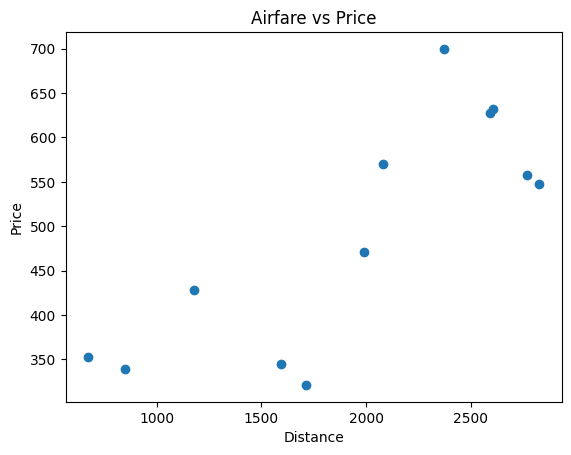

In [4]:
plt.scatter(x= airfare['distance'], y= airfare['price'])
plt.xlabel("Distance")
plt.ylabel("Price")
plt.title("Airfare vs Price")

In [5]:
airfare['price'].median()

509.15

In [6]:
# Function to calculate SSE

def sse_base(priceActual, priceEstimate):
  residualList = []
  for i in range(len(priceActual)):
    residualList.append((priceActual[i] - priceEstimate[i])**2)
  return sum(residualList)

In [7]:
# Function to calculate SSE given intercept and slop

def sse(intercept, slope, distances, prices):
  residualList = []
  for i in range(len(prices)):
    residualList.append((prices[i] - (intercept + slope * distances[i]) ** 2))
  return sum(residualList)

In [8]:
# Convert observed values into list

distances = airfare['distance'].tolist()
prices = airfare['price'].tolist()

print(distances)
print(prices)

[2604, 850, 2590, 673, 2370, 1990, 2766, 2826, 2082, 1715, 1592, 1178]
[631.8, 338.6, 627.9, 352.6, 699.8, 470.7, 557.8, 547.6, 569.83, 321.1, 344.7, 427.6]


In [9]:
# derivative with respect to intercept for SSE function

def d_dI_sse(intercept, slope, distances, prices):
    residualList = [-2 * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

In [10]:
# derivative with respect to slope for SSE function

def d_dS_sse(intercept, slope, distances, prices):
    residualList = [-2 * distances[i] * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

In [11]:
# Iteration Concept

'''
intercept = 1
slope = 0
step_size_intercept = 0
step_size_slope = 0
learning_rate = 0.01

derivative_intercept = d_dI_sse(intercept, slope, distances, prices)
derivative_slope = d_dS_sse(intercept, slope, distances, prices)

step_size_intercept = derivative_intercept * learning_rate
step_size_slope = derivative_slope * learning_rate

new_intercept = intercept - (step_size_intercept)
new_slope = slope - (step_size_slope)
'''

'\nintercept = 1\nslope = 0\nstep_size_intercept = 0\nstep_size_slope = 0\nlearning_rate = 0.01\n\nderivative_intercept = d_dI_sse(intercept, slope, distances, prices)\nderivative_slope = d_dS_sse(intercept, slope, distances, prices)\n\nstep_size_intercept = derivative_intercept * learning_rate\nstep_size_slope = derivative_slope * learning_rate\n\nnew_intercept = intercept - (step_size_intercept)\nnew_slope = slope - (step_size_slope)\n'

In [12]:
# Main iteration function for Gradient Descent Optimization
'''
def function(start_intercept, start_slope, Learning_rate, distances, prices):
  derivative_intercept = d_dI_sse(start_intercept, start_slope, distances, prices)
  derivative_slope = d_dS_sse(start_intercept, start_slope, distances, prices)

  print(derivative_intercept)
  print(derivative_slope)

  step_size_intercept = derivative_intercept * Learning_rate
  step_size_slope = derivative_slope * Learning_rate
  print("Step Size Intercept: ", step_size_intercept)
  print("Step Size Slope: ", step_size_slope)

  new_intercept = start_intercept - step_size_intercept
  new_slope = start_slope - step_size_slope

  if abs(step_size_intercept) < 1 or abs(step_size_slope) < 1:
    return new_intercept, new_slope

  else:
    return function(new_intercept, new_slope, Learning_rate, distances, prices)

test = function(490.836, 0, 0.0000000001, distances, prices)
print(test)
'''

'\ndef function(start_intercept, start_slope, Learning_rate, distances, prices):\n  derivative_intercept = d_dI_sse(start_intercept, start_slope, distances, prices)\n  derivative_slope = d_dS_sse(start_intercept, start_slope, distances, prices)\n\n  print(derivative_intercept)\n  print(derivative_slope)\n\n  step_size_intercept = derivative_intercept * Learning_rate\n  step_size_slope = derivative_slope * Learning_rate\n  print("Step Size Intercept: ", step_size_intercept)\n  print("Step Size Slope: ", step_size_slope)\n\n  new_intercept = start_intercept - step_size_intercept\n  new_slope = start_slope - step_size_slope\n\n  if abs(step_size_intercept) < 1 or abs(step_size_slope) < 1:\n    return new_intercept, new_slope\n\n  else:\n    return function(new_intercept, new_slope, Learning_rate, distances, prices)\n\ntest = function(490.836, 0, 0.0000000001, distances, prices)\nprint(test)\n'

In [13]:
'''
Ran 550,000 iterations with constant learning rate of 0.00000001 for both slope and intercept. Slope stayed at around
0.2387 and did not continue to change, while intercept was steadily increasing. Thus, intercept should use a larger learning
rate, while slope performed well at this rate. Using larger learning rates for slope causes infinite error.
'''

# Derivative with respect to intercept for SSE function
def d_dI_sse(intercept, slope, distances, prices):
    residualList = [-2 * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

# Derivative with respect to slope for SSE function
def d_dS_sse(intercept, slope, distances, prices):
    residualList = [-2 * distances[i] * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

distances = airfare['distance'].values
prices = airfare['price'].values

# Initialize variables
intercept = 0
slope = 0
learning_rate = 0.00000001

sseList = []

for iteration in range(80):
    # Calculate the derivatives
    derivative_intercept = d_dI_sse(intercept, slope, distances, prices)
    derivative_slope = d_dS_sse(intercept, slope, distances, prices)

    # Compute step sizes
    step_size_intercept = derivative_intercept * learning_rate
    step_size_slope = derivative_slope * learning_rate

    # Calculate SSE
    sse_value = sse(intercept, slope, distances, prices)
    sseList.append(sse_value)
    #print(f"Iteration {iteration + 1}: SSE = {sse_value}")

    # Update intercept and slope
    new_intercept = intercept - step_size_intercept
    new_slope = slope - step_size_slope

    # Print step sizes and new values for each iteration
    #print(f"Iteration {iteration + 1}:")
    #print(f"Step Size Intercept: {step_size_intercept}, Step Size Slope: {step_size_slope}")
    #print(f"New Intercept: {new_intercept}, New Slope: {new_slope}\n")

    # Set updated values for the next iteration
    intercept, slope = new_intercept, new_slope

print(f"Intercept: {intercept}, Slope: {slope}\n")

Intercept: 0.000600982918310977, Slope: 0.24026175603585834



In [14]:
'''
Model using 0.00000001 learning rate for slope. Intercept approximations seems to require lots of iterations to converge,
irrespective of learning rate. This suggests that standard gradient descent may not be optimal for this model, which could be
explained by the more non-linear nature of the data.
'''

# Derivative with respect to intercept for SSE function
def d_dI_sse(intercept, slope, distances, prices):
    residualList = [-2 * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

# Derivative with respect to slope for SSE function
def d_dS_sse(intercept, slope, distances, prices):
    residualList = [-2 * distances[i] * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

# Prepare the data
distances = airfare['distance'].values
prices = airfare['price'].values

# Initialize variables
intercept = 0
slope = 0
slope_learning_rate = 0.00000001
intercept_learning_rate = 1

sseList = []

for iteration in range(800):
    # Calculate the derivatives
    derivative_intercept = d_dI_sse(intercept, slope, distances, prices)
    derivative_slope = d_dS_sse(intercept, slope, distances, prices)

    # Compute step sizes
    step_size_intercept = derivative_intercept * learning_rate
    step_size_slope = derivative_slope * learning_rate


    # Calculate SSE
    sse_value = sse(intercept, slope, distances, prices)
    sseList.append(sse_value)
    #print(f"Iteration {iteration + 1}: SSE = {sse_value}")

    # Update intercept and slope
    new_intercept = intercept - step_size_intercept
    new_slope = slope - step_size_slope

    # Print step sizes and new values for each iteration
    #print(f"Iteration {iteration + 1}:")
    #print(f"Step Size Intercept: {step_size_intercept}, Step Size Slope: {step_size_slope}")
    #print(f"New Intercept: {new_intercept}, New Slope: {new_slope}\n")

    # Set updated values for the next iteration
    intercept, slope = new_intercept, new_slope

print(f"Intercept: {intercept}, Slope: {slope}\n")

Intercept: 0.005026066440930184, Slope: 0.2402597429516425



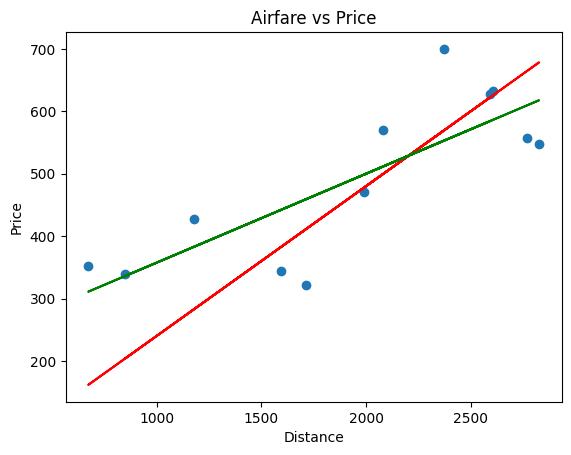

In [15]:
# Compare Gradient Descent Regression model to Least Squares Regression

plt.scatter(x= airfare['distance'], y= airfare['price'])
plt.xlabel("Distance")
plt.ylabel("Price")
plt.title("Airfare vs Price")

plt.plot(airfare['distance'], 0.04927 + 0.24 * airfare['distance'], color= 'red')

model = LinearRegression()
model.fit(airfare[['distance']], airfare['price'])
plt.plot(airfare['distance'], model.intercept_ + model.coef_ * airfare['distance'], color= 'green')

# Demo using Car Highway MPG vs City MPG

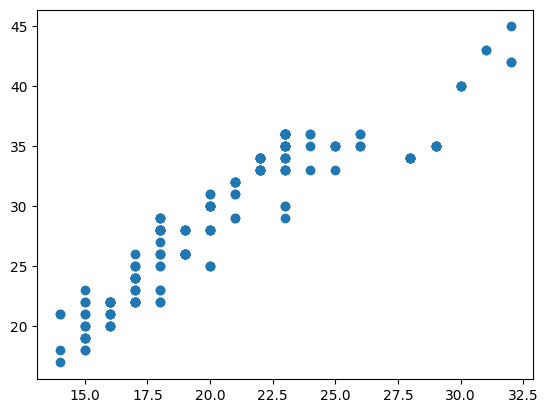

In [16]:
plt.scatter(x= car2['City_MPG'], y= car2['Highway_MPG'])

In [17]:
'''
Uses 8000 iterations with constant learning rate of 0.00001 for intercept and slope. Converges at intercept of 1.43 and
slope of 1.34
'''

# Derivative with respect to intercept for SSE function
def d_dI_sse(intercept, slope, distances, prices):
    residualList = [-2 * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

# Derivative with respect to slope for SSE function
def d_dS_sse(intercept, slope, distances, prices):
    residualList = [-2 * distances[i] * (prices[i] - (intercept + slope * distances[i])) for i in range(len(prices))]
    return sum(residualList)

# Prepare the data
distances = car2['City_MPG'].values
prices = car2['Highway_MPG'].values

# Initialize variables
intercept = 0
slope = 0
learning_rate = 0.00001

sseList = []

for iteration in range(8000):
    # Calculate the derivatives
    derivative_intercept = d_dI_sse(intercept, slope, distances, prices)
    derivative_slope = d_dS_sse(intercept, slope, distances, prices)

    # Compute step sizes
    step_size_intercept = derivative_intercept * learning_rate
    step_size_slope = derivative_slope * learning_rate


    # Calculate SSE
    sse_value = sse(intercept, slope, distances, prices)
    sseList.append(sse_value)
    #print(f"Iteration {iteration + 1}: SSE = {sse_value}")

    # Update intercept and slope
    new_intercept = intercept - step_size_intercept
    new_slope = slope - step_size_slope

    # Print step sizes and new values for each iteration
    #print(f"Iteration {iteration + 1}:")
    #print(f"Step Size Intercept: {step_size_intercept}, Step Size Slope: {step_size_slope}")
    #print(f"New Intercept: {new_intercept}, New Slope: {new_slope}\n")

    # Set updated values for the next iteration
    intercept, slope = new_intercept, new_slope

print(f"Intercept: {intercept}, Slope: {slope}\n")

Intercept: 1.4306705884484232, Slope: 1.342224902491286



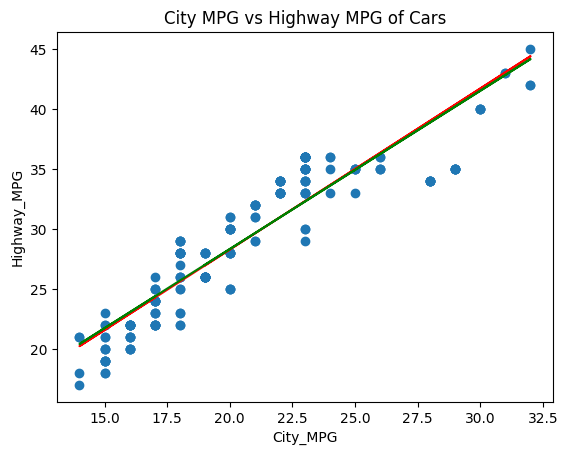

In [18]:
# Compare Gradient Descent Regression model to Least Squares Regression

plt.scatter(x= car2['City_MPG'], y= car2['Highway_MPG'])
plt.xlabel("City_MPG")
plt.ylabel("Highway_MPG")
plt.title("City MPG vs Highway MPG of Cars")

plt.plot(car2['City_MPG'], 1.430 + 1.342 * car2['City_MPG'], color= 'red')

model = LinearRegression()
model.fit(car2[['City_MPG']], car2['Highway_MPG'])
plt.plot(car2['City_MPG'], model.intercept_ + model.coef_ * car2['City_MPG'], color= 'green')